# Análisis Exploratorio de Datos sobre las temperaturas del estado de Guanajuato durante el mes de agosto

### Abstract

En este analisis exploratorio se examina el conjunto de datos sobre los cambios de temperaturas en el estado de Guanajuato, ya que debido al calentamiento global se han visto temperaturas muy altas lo cual no solamente esta sucediendo en el estado si no en todo el pais y esto a su vez quiza como causa de otras problematicas como lo son la escasez de agua entre otras.
La recoleccion de informacion se basa en los datos que pudieron ser recolectados durante el mes de Agosto 2023, es de especial atencion los meses de julio,agosto y septiembre ya que se denominarian temporadas de lluvias, que sin embargo a la fecha no se ha visto iniciada.

## 1. Introducción

El clima ha variado mucho a través del tiempo, una de las causas más importantes es la cantidad de energía recibida por el sol y la manera en que esa energía es distribuida en el planeta (Conde, 2011). El sol tiene efectos en el clima del planeta, sin embargo, sus efectos son transitorios y no de largo plazo. (SEMARNAT, 2009).

Desde la era preindustrial las emisiones de gases de efecto invernadero (GEI) causadas por actividades humanas impulsadas por el crecimiento económico y demográfico se han incrementado de manera significativa. Los efectos de estas altas concentraciones han modificado el sistema climático mundial y son la principal causa del calentamiento global observado desde mediados del siglo XX.

De acuerdo al Inventario Nacional de Emisiones de Gases y Compuestos de Efecto Invernadero con línea base 2015, el transporte contribuyó con el 25.1% de las emisiones nacionales, seguido del sector de generación de energía con el 24.1%, el ganado con el 10.3%, industrias de manufactura y de la construcción con el 9.3%, residuos 6.7%, etc.
En las últimas décadas, los cambios en el clima han causado impactos en los sistemas naturales y humano. En todos los continentes, estos cambios indican la sensibilidad de los sistemas naturales y humanos a los impactos del cambio climático.

La vida en el planeta depende en gran parte de la temperatura que mantiene un equilibrio en los sistemas naturales, los cambios en la temperatura pueden alterar de manera muy significativa los sistemas vivos y traer desastres como de los que ya hemos sido testigos. (Lozano-García, 2004).


Tomado de:https://smaot.guanajuato.gob.mx/sitio/cambio-climatico/175/Conceptos-b%C3%A1sicos

## 2. Exploración de Datos

In [15]:
import requests#se importa la libreria

In [16]:
from bs4 import BeautifulSoup#se importa la libreria

In [17]:
import pandas as pd#se importa la libreria

In [18]:
#Esta funcion se usaria para convertir de farenheit a celsius 
#pero la pagina da un dato incorrecto y no se puede usar 
def convertir_celsius(lista):
    lista_llena=[]
    for i in range(2,10):
        celsius=int(lista[i].text.strip('°'))
        celsius=(celsius-32)*0.55
        lista_llena.append(round(celsius))
    return lista_llena


In [19]:
#se hace la peticion http a la pagina 
pagina_scraping=requests.get('https://weather.com/es-US/tiempo/mensual/l/73f9ca81b32a2ddb370804fe05524de9cb425571bd1f416f4ac887a4174633cf')
soup=BeautifulSoup(pagina_scraping.text,'html.parser')

In [20]:
#Se explora el contenido html para recolectar los datos
#Se llenan arreglos con la informacion obtenida de temperatura maxima y minima asi como el dia a la que pertenece
lista_dias=[]
lista_temp_max=[]
lista_temp_min=[]
days=soup.find_all("span",class_="CalendarDateCell--date--JO3Db")
for i in range(2,len(days)-2):
    lista_dias.append(days[i].text)

max_temp=soup.find_all("div",class_="CalendarDateCell--tempHigh--3k9Yr")
for i in range(2,len(max_temp)-2):
    lista_temp_max.append(max_temp[i].text.strip('°'))

min_temp=soup.find_all("div",class_="CalendarDateCell--tempLow--2WL7c")
for i in range(2,len(min_temp)-2):
    lista_temp_min.append(min_temp[i].text.strip('°'))

In [21]:
#se crea un diccionario, agregando una 4 columna la cual sera el promedio por dia
#inicialmente se llena ese campo con cualquier numero ya que posteriormente se colocaran los datos correctos
dataf={
    "Dias":lista_dias,
    "Temperaturas Maxima":lista_temp_max,
    "Temperaturas Minima":lista_temp_min,
    "Temperatura media  dia":lista_temp_max

}

In [26]:
#se asigna el diccionario a la creacion de un dataframe
df=pd.DataFrame(dataf)

In [28]:
#se hace una pequeña limpieza de datos ya que la pagina por alguna razon manda un "--" en lugar de la temperatura 
#se opto por asignar una temperatura ambiente , todo esto en grados farenheit
df.loc[10,"Temperaturas Maxima"]=77

In [29]:
#Se intenta hacer una conversion de temperaturas ya que aunque se muestra en grados celsius
#todo esto por que la pagina solo da ese dato sin conversion
#se asigna a la 4ta columna el valor medio de temperatura.
for i in df.index:
    df["Temperaturas Maxima"][i]=round((int(df["Temperaturas Maxima"][i])-32)*0.55)
    df["Temperaturas Minima"][i]=round((int(df["Temperaturas Minima"][i])-32)*0.55)
    df["Temperatura media  dia"][i]=(df["Temperaturas Maxima"][i]+df["Temperaturas Minima"][i])//2




In [30]:
#df.to_csv("dataframeTest.csv")

In [31]:
#se hace una impresion de nuestro dataframe
df

,Dias,Temperaturas Maxima,Temperaturas Minima,Temperatura media dia
0,1,28,12,20
1,2,29,12,20
2,3,28,13,20
3,4,26,13,19
4,5,25,12,18
5,6,24,12,18
6,7,28,12,20
7,8,28,14,21
8,9,26,14,20
9,10,26,13,19


In [ ]:
#se almacena la informacion dentro de un archivo cvs
df.to_csv('../Proyecto/temperaturas_AGOSTO.csv')

In [32]:
import matplotlib.pyplot as plt#se importa la libreria

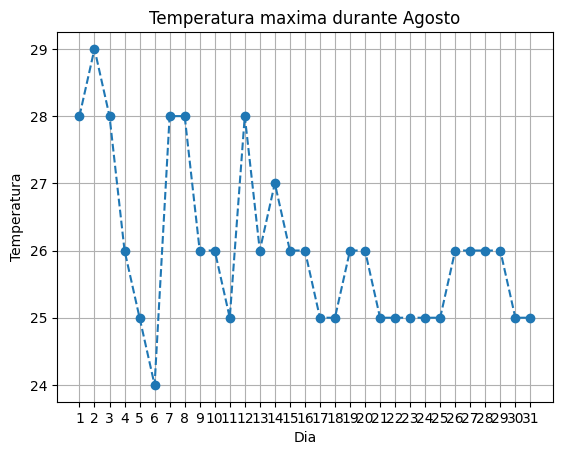

In [33]:
#Se muestra un grafico con las temperaturas maximas del mes
plt.xlabel("Dia")
plt.ylabel("Temperatura")
plt.title("Temperatura maxima durante Agosto")
plt.plot(df["Dias"],df["Temperaturas Maxima"],'o--')
plt.grid()
plt.show()


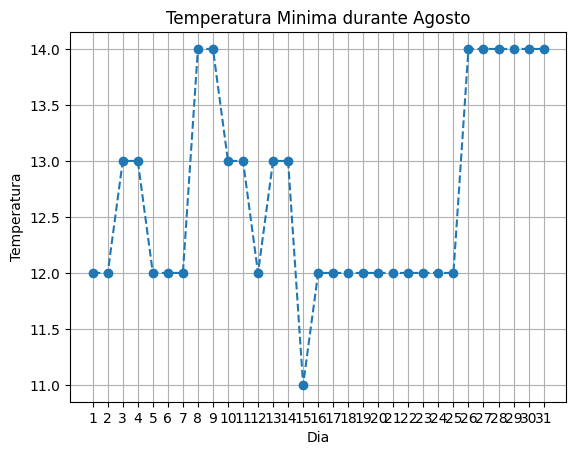

In [34]:
#Se muestra un grafico con las temperaturas minimas del mes
plt.xlabel("Dia")
plt.ylabel("Temperatura")
plt.title("Temperatura Minima durante Agosto")
plt.plot(df["Dias"],df["Temperaturas Minima"],'o--')
plt.grid()
plt.savefig("GraficoTemperaturasminimas.jpg")
plt.show()

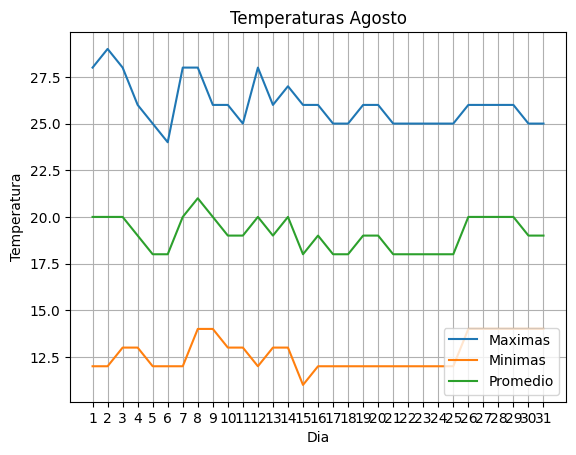

In [35]:
#Grafico donde se muestran temperaturas maximas y minimas
plt.xlabel("Dia")
plt.ylabel("Temperatura")
plt.title("Temperaturas Agosto")
plt.plot(df["Dias"],df["Temperaturas Maxima"],label="Maximas")
plt.plot(df["Dias"],df["Temperaturas Minima"],label="Minimas")
plt.plot(df["Dias"],df["Temperatura media  dia"],label="Promedio")
plt.grid()
plt.legend(loc="lower right")
plt.show()

## 3. Conclusiones

El analisis reveló que la temperatura durante agosto no ha sufrido fluctuaciones tan drasticas como lo han sido en meses anteriores, donde las temperaturas llegaron a rebasar los 37 grados, este es un dato que sorprende ya que a pesar de estar enfrentando el fenomeno conocido como canicula, este no ha tenido afectaciones tan letales como se habia previsto, ya que se esperaban temperaturas que superaran los 40 grados en casi la mayoria de los estados de la republica mexicana ,incluyendo el estado de Guanajuato.